In [1]:
pip install ultralytics opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.6/877.6 kB 14.0 MB/s eta 0:00:00


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

0: 480x640 2 persons, 1 train, 2 traffic lights, 1 backpack, 219.3ms
Speed: 2.2ms preprocess, 219.3ms inference, 16.9ms postprocess per image at shape (1, 3, 480, 640)


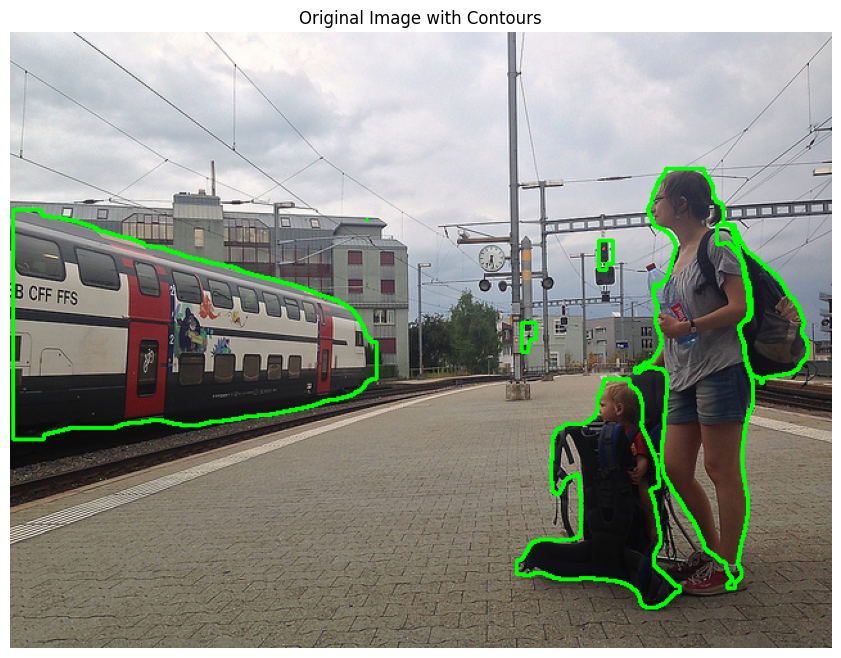

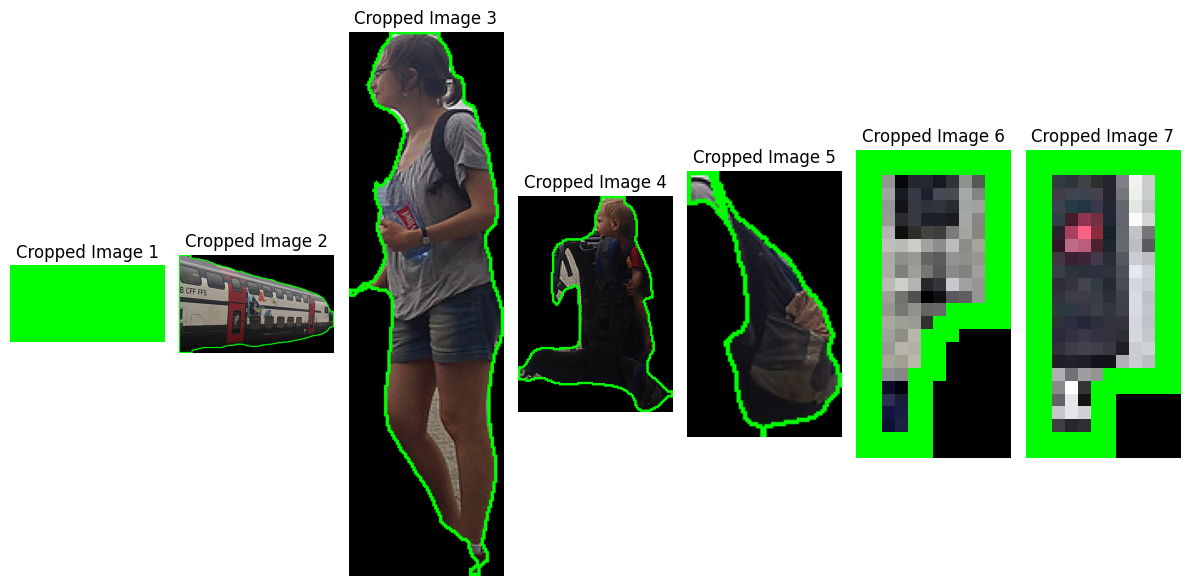

In [48]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
from google.colab import drive

# Google Drive'ı bağlayın
drive.mount('/content/drive')

# Yüklemek istediğiniz görüntünün yolu
image_path = '/content/drive/MyDrive/yolov3_sample_img.jpg'

# YOLOv8 segmentasyon modelini yükleyin
model = YOLO('yolov8n-seg.pt')  # Segmentasyon için YOLOv8 model dosyası

# Görüntüyü yükleyin
image = cv2.imread(image_path)

# Görüntü yüklenip yüklenmediğini kontrol edin
if image is None:
    print("Görüntü yüklenemedi. Lütfen dosya yolunu kontrol edin.")
else:
    # Modeli kullanarak tahmin yapın
    results = model(image)

    # NumPy dizisinin yazdırma ayarlarını değiştir
    np.set_printoptions(threshold=np.inf)

    # Kırpılmış görüntüleri saklamak için bir liste oluşturun
    cropped_images = []

    # Sonuçları işleyin ve segmentasyon maskelerini çıkarın
    for i, result in enumerate(results):
        masks = result.masks  # Maskeleri alın
        for mask in masks:
            #Her maskeyi numpy dizisine dönüştürür ve maske değerlerini 0-255 aralığına getirir.
            mask_array = (mask.data.cpu().numpy().astype(np.uint8) * 255).squeeze()  # Tek kanallı hale getiriyoruz

            contours, _ = cv2.findContours(mask_array, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Her bir kontur için çokgen şeklinde kırpma işlemi
            for contour in contours:
                # Konturu orijinal görüntü üzerinde çizin (hata ayıklama için)
                cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)  # Yeşil kontur

                # Çokgen maskesi oluşturma
                mask = np.zeros(image.shape[:2], dtype=np.uint8)  # Maske için boş bir görüntü
                cv2.fillPoly(mask, [contour], (255))  # Kontur alanını beyaz yap

                # Maskenin etrafındaki bounding box'ı al
                x, y, w, h = cv2.boundingRect(contour)

                # Görüntüyü kes (bounding box kullanarak)
                cropped_image = image[y:y + h, x:x + w]

                # Maskeyi yalnızca bu bölgeye uygulayın
                mask_cropped = mask[y:y + h, x:x + w]  # Maskeyi kırpın

                # Çokgen alanı içindeki görüntüyü almak için maskeyi kullanın
                final_cropped_image = cv2.bitwise_and(cropped_image, cropped_image, mask=mask_cropped)

                # Kırpılmış görüntüyü listeye ekleyin
                cropped_images.append(final_cropped_image)


            # #Her bir kontur için dikdörtgen şeklinde kırpma işlemi
            # for contour in contours:
            #     # Konturun bounding box'ını hesapla
            #     x, y, w, h = cv2.boundingRect(contour)

            #     # Konturu orijinal görüntü üzerinde çizin (hata ayıklama için)
            #     #cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Yeşil dikdörtgen
            #     cropped_image = image[y:y + h, x:x + w]

            #     # Kırpılmış görüntüyü listeye ekleyin
            #     cropped_images.append(cropped_image)

    # RGB formatına dönüştürün
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Matplotlib ile orijinal görüntüyü gösterin
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title('Original Image with Contours')
    plt.show()

    # Kırpılmış görüntüleri tek bir figürde gösterin
    plt.figure(figsize=(12, 8))
    for idx, cropped_image in enumerate(cropped_images):
        cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

        plt.subplot(1, len(cropped_images), idx + 1)  # 1 satır, len(cropped_images) sütun
        plt.imshow(cropped_image_rgb)
        plt.axis('off')
        plt.title(f'Cropped Image {idx + 1}')

    plt.tight_layout()
    plt.show()


In [3]:
np.set_printoptions(threshold=np.inf)
for result in results:
    masks = result.masks  # Maskeleri alın
    for i,mask in enumerate(masks):
      #print(mask)

      if (i==0):

        print("Mask-",i,(mask.data.cpu().numpy().astype(np.uint8) * 255).squeeze()[145:150,]) ##belli bir kısmını yaz
        contours, _ = cv2.findContours(mask_array, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        print("contours:",contours)

Mask- 0 [[  0   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 

In [ ]:
print(results)